# Project 1

In this project as the ML projects usually go the aim is to analyze the data, clean it, fill in the missing values, check for skewness of the data, prepare the data for ML algorithms, train the model on training data and then predict on the test data.

I would like to explain each of these steps briefly here so that's it's easier to read the code below.

## Getting started

After reading in the data we go directly for data exploration, since this exercise is about the sale price of the house, I was interested in finding out which were the most expensive neighborhoods in the data, and I wanted to check whether the sale price increases with the gross living area or not. Turns out it does, as the analysis shows below.

## Analyzing data

A good way to get the kind of data you are dealing with is to plot a histogram for each attribute.
We can see from the hostogram that sale price is right skewed and so are most of the other continuous variables like Gross living area, basement sq. ft., 1st floor sq. ft. etc. We'll have to fix this skewness later on before feeding it to our model.

To check the correlation between the data I'm going to plot a correlation matrix heatmap using seaborn library.
Checking for correlation is important because if there's multicollinearity in our data we will be able to see in the heatmap clearly, otherwise it can affect the output of our model.

## Filling the missing values

I have identified that there are 3 types of missing values
a) The physical feature itself is not present in the house e.g. pool, basement, fireplace, alley etc.
b) The data points that are missing and can be filled with the most common feature.
c) The measurment of the features missing in 'a)'. They have to be filled with zero.

## Skewness check

After filling in the missing data we check for the skewness of the data, our sale price was right skewed so we preformed a log1p trasformation to make it more normal, because the ML models perform better with normal data.
I will check for skewness of the data and filter out the variables where abs(skewness) > 0.75 and perform log1p transformation.

## Preparing data for ML models

We need to convert the categorical variables to numeric type, the easiest way is to use sklearn's OneHotEncoder class.
For numeric variables we can feed them to the model as it is but it is a good practice to standardize them (some ML algorithms like SVMs only accept normalized data), so we use sklearns StandardScaler class and feed them both to ColumnTransformer class to biuld our input for us.

## Developing a model

This is the final step and it is the part which I need to improve further, for now I'm just trying to check how well the model does on some simple ML algorithms like LiearRigression and DecisionTree etc. Finally we use GridSearchCV to select the best performing model and predict the sale price for test data set.

In [51]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
pd.set_option('display.max_columns', 81)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action = 'ignore')

In [52]:
#importing files
train = pd.read_csv('C:/Users/guhemant/Downloads/handson-ml-master/datasets/Boston/train.csv')
test = pd.read_csv('C:/Users/guhemant/Downloads/handson-ml-master/datasets/Boston/test.csv')

In [53]:
train.shape

(1460, 81)

In [54]:
import seaborn as sns
data = train.groupby(['Neighborhood'])['SalePrice'].mean()
names = data.index
expensive_neoghborhoods = data.sort_values(ascending=False)[:5].index
print(data.sort_values(ascending=False)[:5])
print('\nAverage house price:',train['SalePrice'].mean())

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

Average house price: 180921.19589041095


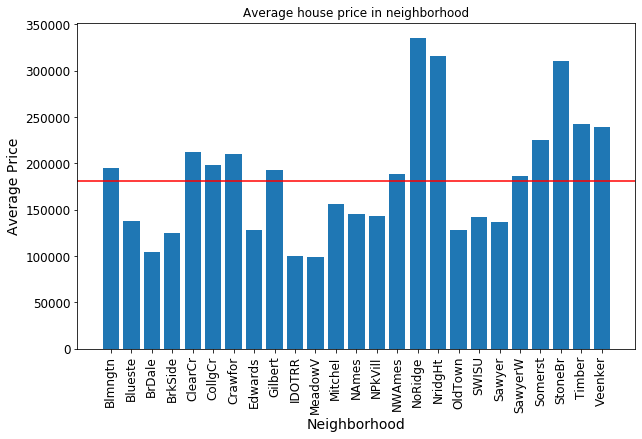

In [55]:
plt.figure(figsize=(10,6))
plt.bar(names, data)
plt.xticks(rotation=90)
plt.title('Average house price in neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.axhline(y=train['SalePrice'].mean(), color='r', linestyle='-')
plt.show()

<font size = "4">Here we can see that the more expensive neighborhoods are quite large than the average house in the dataset, except for the Veenker house</font>

In [56]:
print('Average house size:',train['GrLivArea'].mean())
for hood in expensive_neoghborhoods:
    print(hood + ' house size', train[train['Neighborhood']==hood]['GrLivArea'].mean())

Average house size: 1515.463698630137
NoRidge house size 2508.8536585365855
NridgHt house size 1915.948051948052
StoneBr house size 1879.08
Timber house size 1749.3684210526317
Veenker house size 1539.6363636363637


In [57]:
#Removing id columns are they are not relevant to the analysis
train_id = train['Id']
test_id = test['Id']

train = train.drop(['Id'], axis=1)
test = test.drop(['Id'], axis=1)

In [58]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<font size = 4>The below one line of code can give us information about the data types and missing data</font>

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [60]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<font size = "4">A quick way to get a feel of the data is to plot a histogram for numerical attributes, we can observe some intersting trends here about the distribution of the data.</font>

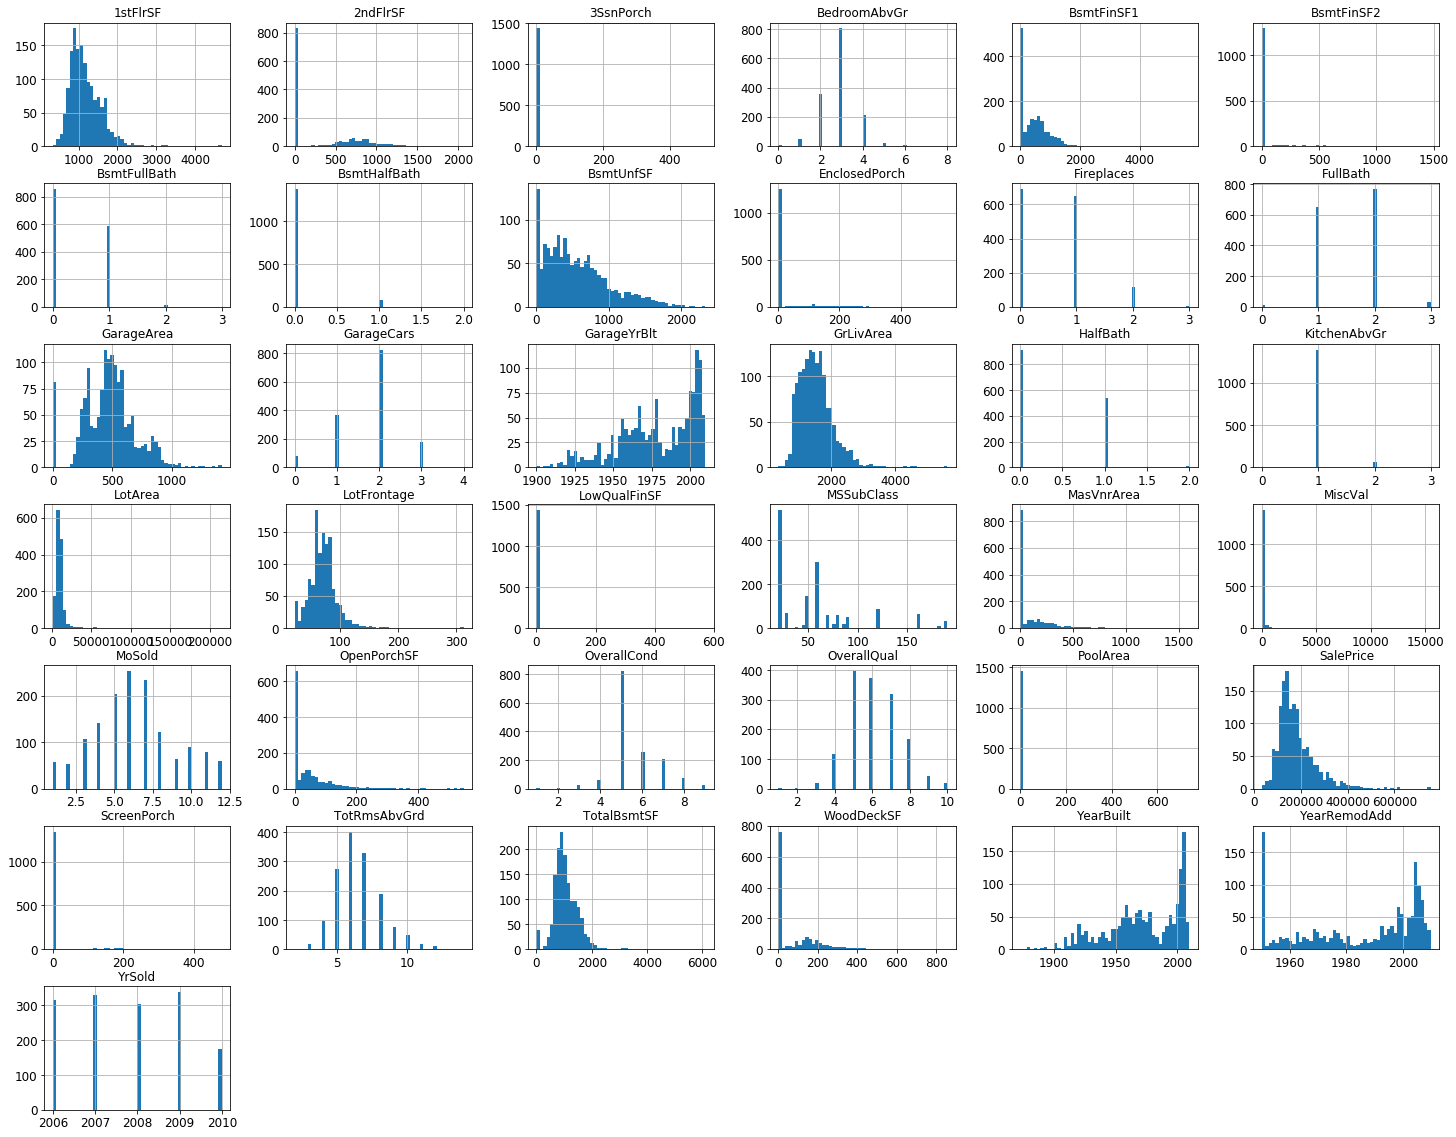

In [61]:
train.hist(bins=50, figsize=(25,20))
plt.show()

<font size = "4">Plotting a heatmap of the correlation matrix can tell us about the inportant and relevant features that we might need to study in detail.</font>

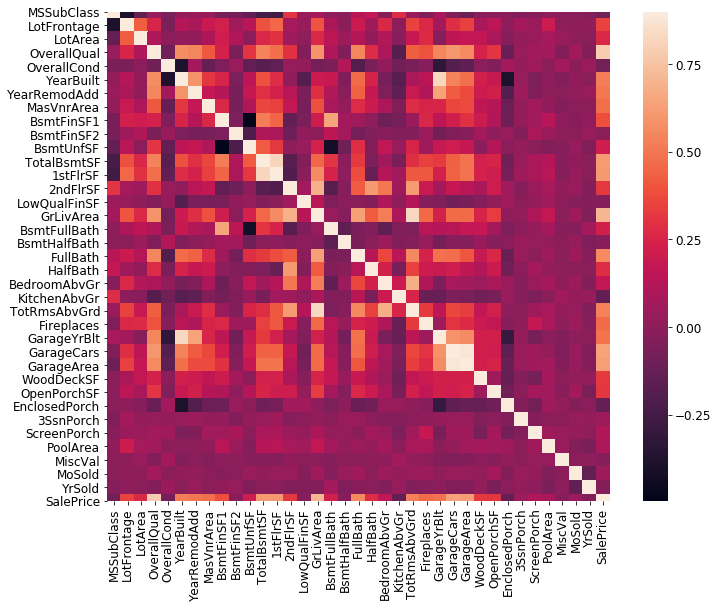

In [62]:
#PLot correlation
import seaborn as sns
corr_mat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat, vmax=0.9, square=True)

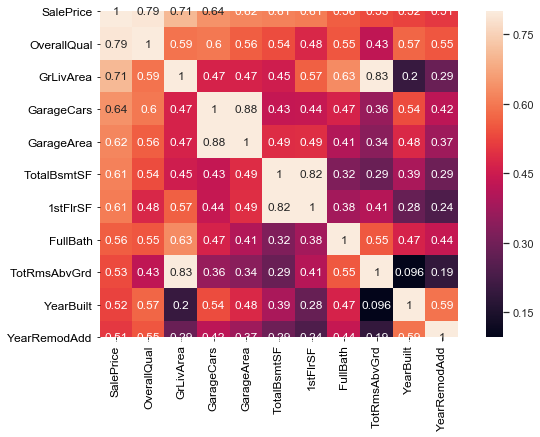

In [63]:
#Plotting correlation matrix for most significant variables

high_corr_cols = corr_mat['SalePrice'].sort_values(ascending=False)[:11].index
high_corr_plot = train[high_corr_cols].corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.set(font_scale=1)
sns.heatmap(high_corr_plot, cbar=True, annot=True, vmax=0.8, square=True)
plt.show()

In [65]:
high_corr_cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

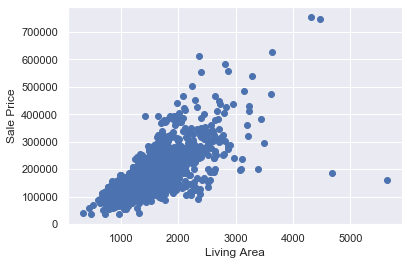

In [10]:
#Scatterplot living area and Salesprice
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.xlabel('Living Area')
plt.ylabel('Sale Price')
plt.show()

In [11]:
#Remove outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

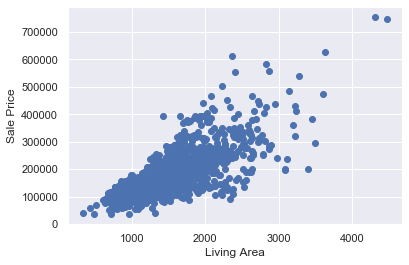

In [12]:
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.xlabel('Living Area')
plt.ylabel('Sale Price')
plt.show()

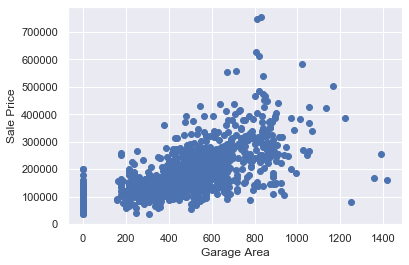

In [68]:
plt.scatter(train['GarageArea'], train['SalePrice'])
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

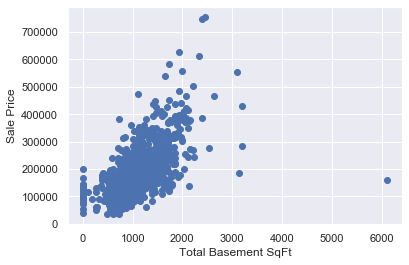

In [69]:
plt.scatter(train['TotalBsmtSF'], train['SalePrice'])
plt.xlabel('Total Basement SqFt')
plt.ylabel('Sale Price')
plt.show()

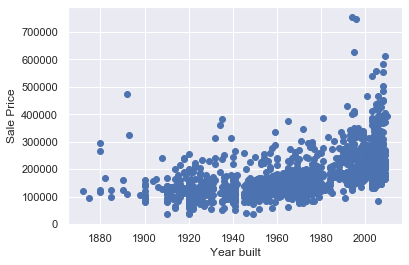

In [13]:
#Scatter plot between Year built and Sale price
plt.scatter(train['YearBuilt'], train['SalePrice'])
plt.xlabel('Year built')
plt.ylabel('Sale Price')
plt.show()

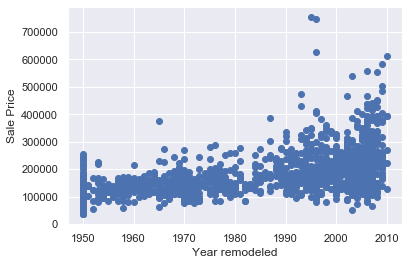

In [14]:
#Scatter plot between Year remodeled and Sale price
plt.scatter(train['YearRemodAdd'], train['SalePrice'])
plt.xlabel('Year remodeled')
plt.ylabel('Sale Price')
plt.show()

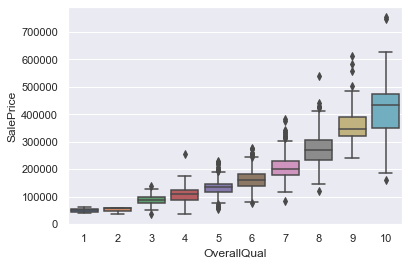

In [70]:
#Box plot between Over all quality and Sale price
import seaborn as sns
sns.boxplot(train['OverallQual'], train['SalePrice'])
plt.show()

<font size = "4">As we can see from the above plot that the sale price increases with the over all quality of the house as is expected</font>

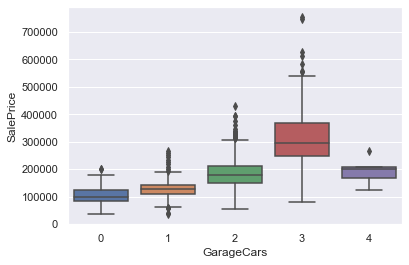

In [71]:
#Box plot between garage cars and sale price
sns.boxplot(train['GarageCars'], train['SalePrice'])
plt.show()

<font size = "4">From the scatter plot above we can see that there is a linear relationship between the floor area and the sale price but looking at the above plot and the total rooms vs sale price it looks like the sale price does not go up after a certain threshold.</font>

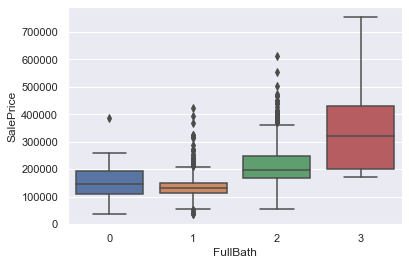

In [72]:
#Box plot between bathrooms and sale price
sns.boxplot(train['FullBath'], train['SalePrice'])
plt.show()

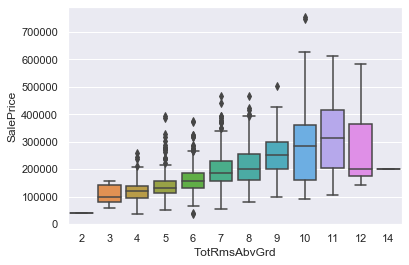

In [73]:
#Box plot between total rooms and sale price
sns.boxplot(train['TotRmsAbvGrd'], train['SalePrice'])
plt.show()

<font size = "4">In the below few cells we are checking for the normalcy of the target variable, as we know that machine learning algorithms love normally distributed data so we'll try to make our target variable a better fit of normal distribution</font>

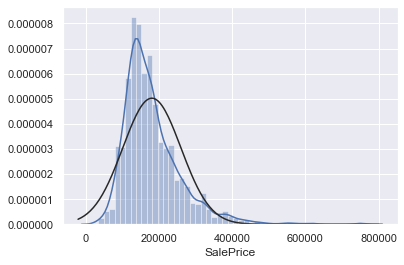

mu = 180921.20, sigma = 79415.29
skewness = 1.88 


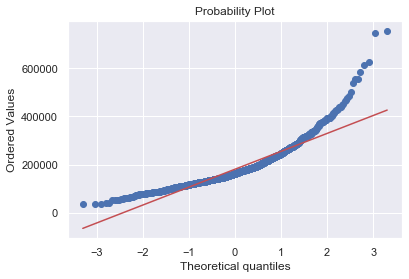

In [74]:
from scipy import stats
from scipy.stats import norm

sns.distplot(train['SalePrice'], fit=norm);
plt.show()

mu, sigma = norm.fit(train['SalePrice'])
print('mu = {:.2f}, sigma = {:.2f}'.format(mu, sigma))
print('skewness = {:.2f} '.format(train['SalePrice'].skew()))

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

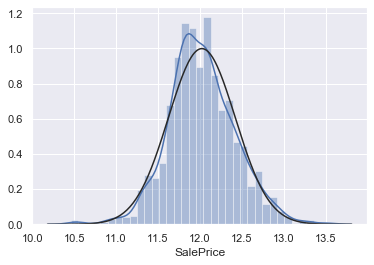

mu = 12.02, sigma = 0.40
skewness = 0.12 


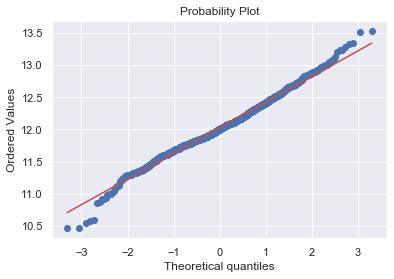

In [75]:
#log transform salesprice and repeat above step
train['SalePrice'] = np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice'], fit=norm);
plt.show()

mu, sigma = norm.fit(train['SalePrice'])
print('mu = {:.2f}, sigma = {:.2f}'.format(mu, sigma))
print('skewness = {:.2f} '.format(train['SalePrice'].skew()))

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

<font size = "4">Once our target variable now looks normally distributed, we shift our focus to the missing values in our data set.
We can either make pipelines that we can fit and transform on train and test data or we can append the two datasets.
I have chosen to append the data and do it in one go.</font>

In [76]:
#Append train and test set
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['SalePrice'].values

combined_data = pd.concat([train, test], ignore_index=True)
combined_data.drop(['SalePrice'], axis=1, inplace=True)
#combined_data.columns
combined_data.shape

(2919, 79)

In [77]:
#Make missing values df
missing_data = combined_data.isnull().sum()
missing_data = missing_data.drop(missing_data[missing_data==0].index)
missing_data.sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageArea         1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
dtype: int64

<font size = "4">Looking at the data description a lot of missing data points in categorical features we just the physical features missing from the house, hence we are filling them with "None".
I have created seperate cells for the variables where fillna method has been applies differently. (e.g. filling with none, or filling with 0 or mode etc.)</font>

In [78]:
combined_data['PoolQC'] = combined_data['PoolQC'].fillna("None")
combined_data['MiscFeature'] = combined_data['MiscFeature'].fillna("None")
combined_data['Alley'] = combined_data['Alley'].fillna("None")
combined_data['Fence'] = combined_data['Fence'].fillna("None")
combined_data['FireplaceQu'] = combined_data['FireplaceQu'].fillna("None")
combined_data['GarageQual'] = combined_data['GarageQual'].fillna("None")
combined_data['GarageCond'] = combined_data['GarageCond'].fillna("None")
combined_data['GarageFinish'] = combined_data['GarageFinish'].fillna("None")
combined_data['GarageType'] = combined_data['GarageType'].fillna("None")
combined_data['BsmtExposure'] = combined_data['BsmtExposure'].fillna("None")
combined_data['BsmtCond'] = combined_data['BsmtCond'].fillna("None")
combined_data['BsmtQual'] = combined_data['BsmtQual'].fillna("None")
combined_data['BsmtFinType2'] = combined_data['BsmtFinType2'].fillna("None")
combined_data['BsmtFinType1'] = combined_data['BsmtFinType1'].fillna("None")
combined_data['MasVnrType'] = combined_data['MasVnrType'].fillna("None")

In [79]:
combined_data['LotFrontage'] = combined_data.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))
combined_data['MSZoning'] = combined_data['MSZoning'].fillna(combined_data['MSZoning'].mode()[0])
combined_data['Utilities'] = combined_data['Utilities'].fillna(combined_data['Utilities'].mode()[0])
combined_data['Electrical'] = combined_data['Electrical'].fillna(combined_data['Electrical'].mode()[0])
combined_data['Exterior1st'] = combined_data['Exterior1st'].fillna(combined_data['Exterior1st'].mode()[0])
combined_data['Exterior2nd'] = combined_data['Exterior2nd'].fillna(combined_data['Exterior2nd'].mode()[0])
combined_data['KitchenQual'] = combined_data['KitchenQual'].fillna(combined_data['KitchenQual'].mode()[0])
combined_data['SaleType'] = combined_data['SaleType'].fillna(combined_data['SaleType'].mode()[0])

In [80]:
combined_data['GarageYrBlt'] = combined_data['GarageYrBlt'].fillna(0)
combined_data['MasVnrArea'] = combined_data['MasVnrArea'].fillna(0)
combined_data['BsmtFullBath'] = combined_data['BsmtFullBath'].fillna(0)
combined_data['BsmtHalfBath'] = combined_data['BsmtHalfBath'].fillna(0)
combined_data['BsmtUnfSF'] = combined_data['BsmtUnfSF'].fillna(0)
combined_data['TotalBsmtSF'] = combined_data['TotalBsmtSF'].fillna(0)
combined_data['GarageArea'] = combined_data['GarageArea'].fillna(0)
combined_data['GarageCars'] = combined_data['GarageCars'].fillna(0)
combined_data['BsmtFinSF1'] = combined_data['BsmtFinSF1'].fillna(0)
combined_data['BsmtFinSF2'] = combined_data['BsmtFinSF2'].fillna(0)


In [81]:
combined_data['Functional'] = combined_data['Functional'].fillna('Typ')

In [82]:
missing_data = combined_data.isnull().sum()
missing_data = missing_data.drop(missing_data[missing_data==0].index)
missing_data

Series([], dtype: int64)

<font size = "4">Once we are done with the missing data points we now look at some variables which look like numerical features but are actually categorical, hence we convert them to str object</font>

In [83]:
combined_data['MSSubClass'] = combined_data['MSSubClass'].apply(str)
combined_data['OverallQual'] = combined_data['OverallQual'].apply(str)
combined_data['OverallCond'] = combined_data['OverallCond'].apply(str)
combined_data['MoSold'] = combined_data['MoSold'].apply(str)

<font size = "4">Seperating numerical and categorical variables for some feature engineering (not sure if the below few cells are actually feature engineering or not :p)</font>

In [84]:
num_feats = combined_data.dtypes[combined_data.dtypes != 'object'].index
num_feats

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'OpenPorchSF',
       'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'],
      dtype='object')

In [85]:
cat_feats = combined_data.dtypes[combined_data.dtypes == 'object'].index
cat_feats

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'MoSold', 'Neighborhood', 'OverallCond', 'OverallQual', 'PavedDrive',
       'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType',
       'Street', 'Utilities'],
      dtype='object')

In [88]:
skewness = combined_data[num_feats].skew(axis=0, skipna=True).sort_values(ascending=False)
skewness[abs(skewness)>0.75]

MiscVal          21.958480
PoolArea         16.907017
LotArea          12.829025
LowQualFinSF     12.094977
3SsnPorch        11.381914
KitchenAbvGr      4.304467
BsmtFinSF2        4.148275
EnclosedPorch     4.005950
ScreenPorch       3.948723
BsmtHalfBath      3.933616
MasVnrArea        2.614936
OpenPorchSF       2.536417
WoodDeckSF        1.843380
LotFrontage       1.506478
1stFlrSF          1.470360
BsmtFinSF1        1.425963
GrLivArea         1.270010
TotalBsmtSF       1.157489
BsmtUnfSF         0.919812
2ndFlrSF          0.862118
TotRmsAbvGrd      0.758757
GarageYrBlt      -3.908213
dtype: float64

<font size = "4">We check for the skewness for numerical features because as mentioned earlier the ML algorithms love normally distributed features, earlier I had set a skewness cut off at 0.5 for log transformation but that was making things worse for some features so I had to choose 0.75.</font>

In [89]:
skewed_feats = skewness[abs(skewness)>0.75].index
skewed_feats

Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'KitchenAbvGr', 'BsmtFinSF2', 'EnclosedPorch', 'ScreenPorch',
       'BsmtHalfBath', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF',
       'LotFrontage', '1stFlrSF', 'BsmtFinSF1', 'GrLivArea', 'TotalBsmtSF',
       'BsmtUnfSF', '2ndFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt'],
      dtype='object')

In [90]:
for feat in skewed_feats:
    combined_data[feat] = np.log1p(combined_data[feat])

skewness = combined_data[num_feats].skew(axis=0, skipna=True).sort_values(ascending=False)
skewness[skewed_feats]

MiscVal           5.216665
PoolArea         15.006047
LotArea          -0.505010
LowQualFinSF      8.562091
3SsnPorch         8.829794
KitchenAbvGr      3.522161
BsmtFinSF2        2.463749
EnclosedPorch     1.962089
ScreenPorch       2.947420
BsmtHalfBath      3.776703
MasVnrArea        0.537294
OpenPorchSF      -0.041819
WoodDeckSF        0.158114
LotFrontage      -1.024132
1stFlrSF          0.064861
BsmtFinSF1       -0.616949
GrLivArea         0.013194
TotalBsmtSF      -4.958842
BsmtUnfSF        -2.156314
2ndFlrSF          0.305206
TotRmsAbvGrd      0.035125
GarageYrBlt      -3.928000
dtype: float64

<font size = "4">Now the final step towards data preparation, standardising the data and using OneHotEncoder for categorical features and then merging them with ColumnTransformer class</font>

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
            ('std_scaler', StandardScaler())
])

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = OneHotEncoder()
combined_data_cat_1hot = encoder.fit_transform(combined_data[cat_feats])

full_pipeline = ColumnTransformer([
            ('num', num_pipeline, num_feats),
            ('cat', OneHotEncoder(), cat_feats)
])

combined_data_prepared = full_pipeline.fit_transform(combined_data)

In [37]:
combined_data_prepared.shape

(2917, 344)

In [38]:
train = combined_data_prepared[:ntrain]
test = combined_data_prepared[ntrain:]

In [39]:
def display_scores(scores):
    """This function takes an array of scores from a regressor function
       and prints the array, mean and median"""
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Std deviation: ', scores.std())

<font size = "4">I'm not using too many fancy ML algorithms here because it's just my first project and I just had to show how to approach a problem, anyway most of the work is in cleaning and preparing the data.
In the following few cells I have run linear regression, decision tree regression and then finally used Random forest with GridSearchCV to get the best parameters and using those parameters predict the sale price for test set.</font>

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, train, y_train, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-scores)

In [41]:
display_scores(lin_rmse_scores)

Scores:  [0.12718675 0.10595055 0.12181505 0.13043769 0.1546328  0.19737627
 0.12830609 0.10128354 0.1070068  0.12772932]
Mean:  0.13017248749595475
Std deviation:  0.0267597871701721


In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg, train, y_train, scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [43]:
display_scores(tree_rmse_scores)

Scores:  [0.20233523 0.19260169 0.177135   0.21449656 0.23229783 0.17754965
 0.20204977 0.19980991 0.19643243 0.20302467]
Mean:  0.19977327307537648
Std deviation:  0.015381530438601987


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

param_grid = [
    {'n_estimators': [1, 3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [1, 3, 10], 'max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [45]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [46]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [47]:
final_model = grid_search.best_estimator_

<font size = "4">predicting on test data</font>

In [49]:
np.expm1(final_model.predict(test))

array([125945.42116373, 152587.72411831, 187295.63692667, ...,
       169457.49945644, 109363.26255071, 216832.28494692])